In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno

In [2]:
df  = pd.read_csv("pl_player_statistics.csv")

In [3]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [4]:
df.shape

(571, 59)

In [5]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [6]:
# This is an initial idea of which columns will be used for the analysis. This list may be updated in the future

relevant_columns = ['Name', 'Club', 'Position', 'Nationality', 'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match', 
        'Shots', 'Shots on target', 'Shooting accuracy %', 'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles',
        'Tackle success %', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big chances created', 'Saves', 
        'Penalties saved', 'Yellow cards', 'Red cards']

df = df.loc[:, relevant_columns]


In [7]:
df.head()

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Tackle success %,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Saves,Penalties saved,Yellow cards,Red cards
0,Bernd Leno,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,NaN,...,NaN,7.0,0,1783,27.86,NaN,222.0,1.0,2,0
1,Matt Macey,Arsenal,Goalkeeper,England,26.0,0,0,0,0,NaN,...,NaN,0.0,0,0,0.00,NaN,0.0,0.0,0,0
2,Rúnar Alex Rúnarsson,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,NaN,...,NaN,0.0,0,0,0.00,NaN,0.0,0.0,0,0
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,NaN,...,78%,1.0,18,7125,44.53,28.0,NaN,NaN,23,0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,NaN,...,81%,0.0,1,519,32.44,1.0,NaN,NaN,2,0


In [8]:
df.shape

(571, 27)

In [9]:
"""
Name: Name of the player
Club: Club the player plays for
Position: Position of the player
Nationality: Nationality of the player
Age: Age of the player
Appearances: Number of appearances (including substitute appearances)
Wins: Number of wins
Losses: Number of losses
Goals: Number of goals scored in the EPL
Goals per match: Average number of goals per match
Shots: Number of shots
Shots on target: Number of shots on target
Shooting accuracy %: Shooting accuracy in percentage
Big chances missed: Number of big chances missed
Clean sheets: Number of clean sheets
Goals conceded: Number of goals conceded
Tackles: Number of tackles
Tackle success %: Tackle success in percentage
Errors leading to goal: Number of errors that led to a goal
Assists: Number of assists
Passes: Number of passes
Passes per match: Average number of passes per match
Big chances created: Number of big chances created
Saves: Number of saves
Penalties saved: Number of penalties saved
Yellow cards: Number of yellow cards
Red cards: Number of red cards
"""

'\nName: Name of the player\nClub: Club the player plays for\nPosition: Position of the player\nNationality: Nationality of the player\nAge: Age of the player\nAppearances: Number of appearances (including substitute appearances)\nWins: Number of wins\nLosses: Number of losses\nGoals: Number of goals scored in the EPL\nGoals per match: Average number of goals per match\nShots: Number of shots\nShots on target: Number of shots on target\nShooting accuracy %: Shooting accuracy in percentage\nBig chances missed: Number of big chances missed\nClean sheets: Number of clean sheets\nGoals conceded: Number of goals conceded\nTackles: Number of tackles\nTackle success %: Tackle success in percentage\nErrors leading to goal: Number of errors that led to a goal\nAssists: Number of assists\nPasses: Number of passes\nPasses per match: Average number of passes per match\nBig chances created: Number of big chances created\nSaves: Number of saves\nPenalties saved: Number of penalties saved\nYellow car

In [10]:
df.dtypes

Name                       object
Club                       object
Position                   object
Nationality                object
Age                       float64
Appearances                 int64
Wins                        int64
Losses                      int64
Goals                       int64
Goals per match           float64
Shots                     float64
Shots on target           float64
Shooting accuracy %        object
Big chances missed        float64
Clean sheets              float64
Goals conceded            float64
Tackles                   float64
Tackle success %           object
Errors leading to goal    float64
Assists                     int64
Passes                      int64
Passes per match          float64
Big chances created       float64
Saves                     float64
Penalties saved           float64
Yellow cards                int64
Red cards                   int64
dtype: object

In [11]:
df['Shooting accuracy %'] = df['Shooting accuracy %'].str.rstrip('%').astype(float)
df['Shooting accuracy %'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Shooting accuracy %, dtype: float64

In [12]:
df['Tackle success %'] = df['Tackle success %'].str.rstrip('%').astype(float)
df['Tackle success %'].head()

0     NaN
1     NaN
2     NaN
3    78.0
4    81.0
Name: Tackle success %, dtype: float64

In [13]:
df.dtypes

Name                       object
Club                       object
Position                   object
Nationality                object
Age                       float64
Appearances                 int64
Wins                        int64
Losses                      int64
Goals                       int64
Goals per match           float64
Shots                     float64
Shots on target           float64
Shooting accuracy %       float64
Big chances missed        float64
Clean sheets              float64
Goals conceded            float64
Tackles                   float64
Tackle success %          float64
Errors leading to goal    float64
Assists                     int64
Passes                      int64
Passes per match          float64
Big chances created       float64
Saves                     float64
Penalties saved           float64
Yellow cards                int64
Red cards                   int64
dtype: object

In [14]:
df.isnull().sum()

# many of the missing values are due to the fact that certain statistics are not relevant for certain positions.

Name                        0
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Errors leading to goal    112
Assists                     0
Passes                      0
Passes per match            0
Big chances created        69
Saves                     502
Penalties saved           502
Yellow cards                0
Red cards                   0
dtype: int64

In [15]:
# remove players with no age and nationality information

df = df.dropna(subset=['Age', 'Nationality'])


In [16]:
# get number of players with 0 appearances
num_players_zero_appearances = df[df['Appearances'] == 0].shape[0]
num_players_zero_appearances


90

In [17]:
# remove players with 0 appearances
df = df[df['Appearances'] != 0]
df.shape

(480, 27)

In [18]:
{x:df[x].duplicated().sum() for x in df}

# the only column where having duplicates would be an issue is the Name column.

{'Name': 0,
 'Club': 460,
 'Position': 476,
 'Nationality': 424,
 'Age': 458,
 'Appearances': 283,
 'Wins': 361,
 'Losses': 379,
 'Goals': 425,
 'Goals per match': 409,
 'Shots': 326,
 'Shots on target': 374,
 'Shooting accuracy %': 429,
 'Big chances missed': 431,
 'Clean sheets': 414,
 'Goals conceded': 359,
 'Tackles': 266,
 'Tackle success %': 425,
 'Errors leading to goal': 463,
 'Assists': 437,
 'Passes': 32,
 'Passes per match': 38,
 'Big chances created': 425,
 'Saves': 435,
 'Penalties saved': 471,
 'Yellow cards': 431,
 'Red cards': 474}

<AxesSubplot:>

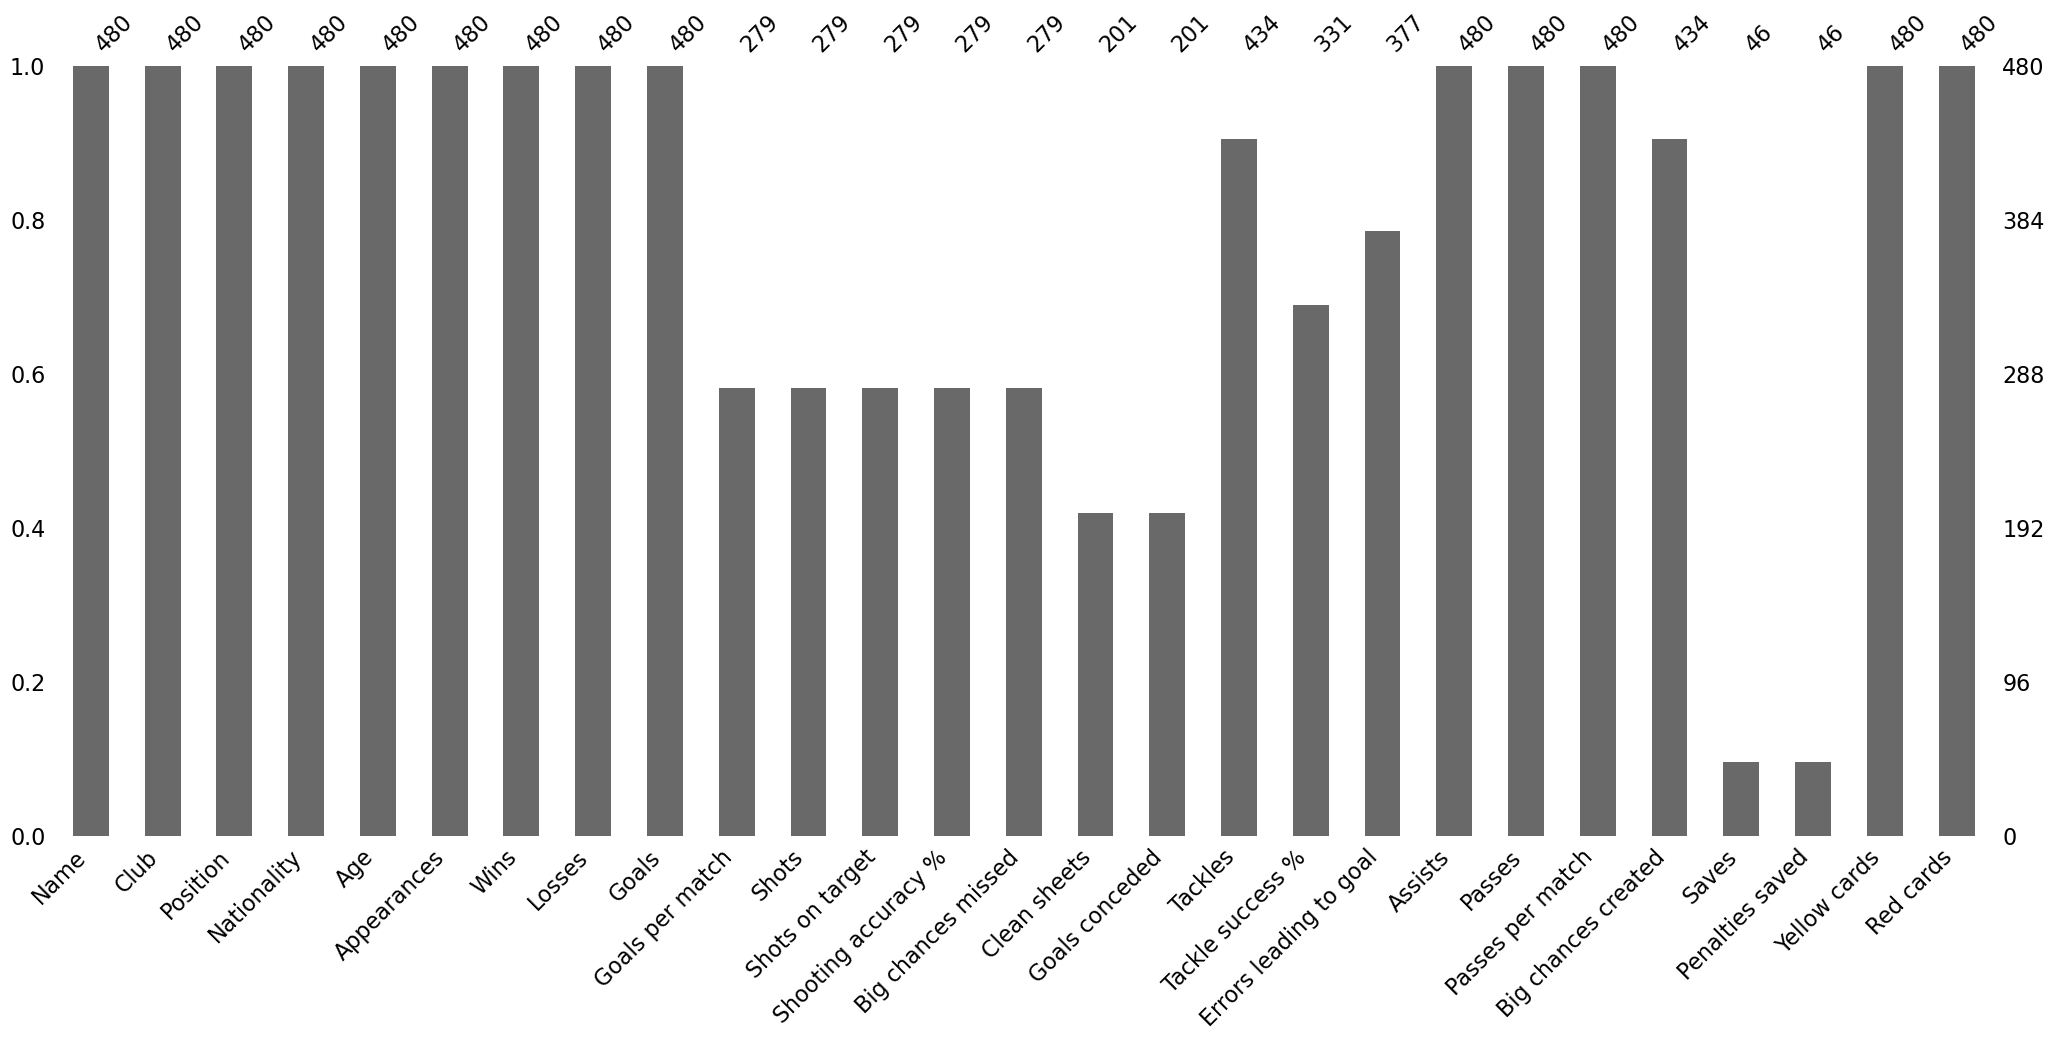

In [19]:
missingno.bar(df)

In [20]:
num_cols = df.dtypes[df.dtypes!="O"].index.tolist()

In [21]:
num_cols

['Age',
 'Appearances',
 'Wins',
 'Losses',
 'Goals',
 'Goals per match',
 'Shots',
 'Shots on target',
 'Shooting accuracy %',
 'Big chances missed',
 'Clean sheets',
 'Goals conceded',
 'Tackles',
 'Tackle success %',
 'Errors leading to goal',
 'Assists',
 'Passes',
 'Passes per match',
 'Big chances created',
 'Saves',
 'Penalties saved',
 'Yellow cards',
 'Red cards']

In [22]:
df[num_cols]

,Age,Appearances,Wins,Losses,Goals,Goals per match,Shots,Shots on target,Shooting accuracy %,Big chances missed,...,Tackle success %,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Saves,Penalties saved,Yellow cards,Red cards
0,28.0,64,28,16,0,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,0,1783,27.86,NaN,222.0,1.0,2,0
3,25.0,160,90,37,7,NaN,NaN,NaN,NaN,NaN,...,78.0,1.0,18,7125,44.53,28.0,NaN,NaN,23,0
4,23.0,16,7,5,1,NaN,NaN,NaN,NaN,NaN,...,81.0,0.0,1,519,32.44,1.0,NaN,NaN,2,0
6,32.0,44,21,11,3,NaN,NaN,NaN,NaN,NaN,...,61.0,1.0,2,2416,54.91,4.0,NaN,NaN,18,0
7,25.0,41,25,9,0,NaN,NaN,NaN,NaN,NaN,...,70.0,0.0,0,2200,53.66,0.0,NaN,NaN,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.0,1,1,0,0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0,5,5.00,0.0,NaN,NaN,0,0
566,20.0,31,14,7,3,0.10,19.0,6.0,32.0,3.0,...,NaN,NaN,4,399,12.87,5.0,NaN,NaN,3,0
567,29.0,78,32,23,32,0.41,237.0,82.0,35.0,20.0,...,NaN,NaN,13,2108,27.03,26.0,NaN,NaN,7,0
568,24.0,105,27,47,5,0.05,78.0,21.0,27.0,6.0,...,NaN,NaN,12,1434,13.66,13.0,NaN,NaN,4,0


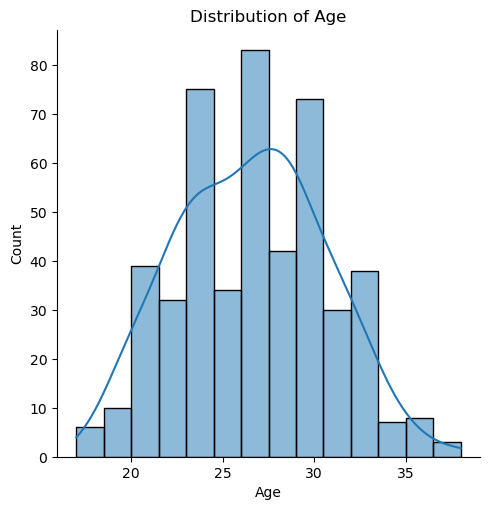

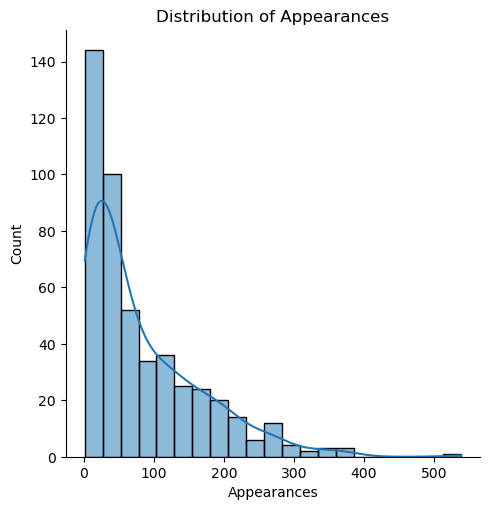

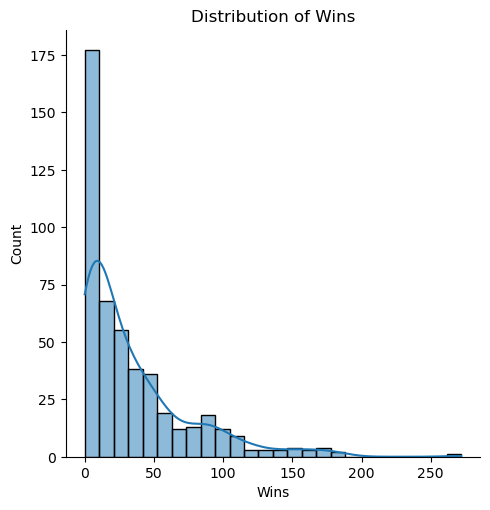

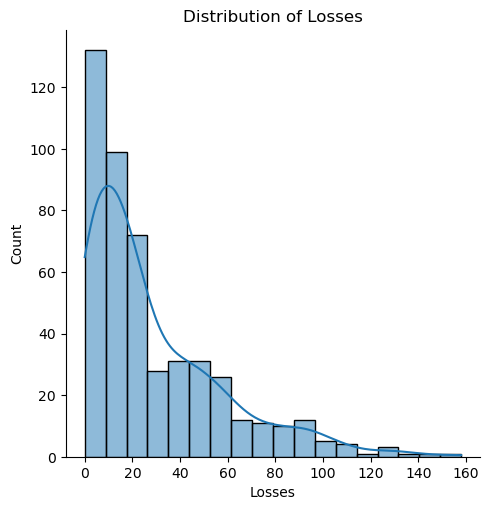

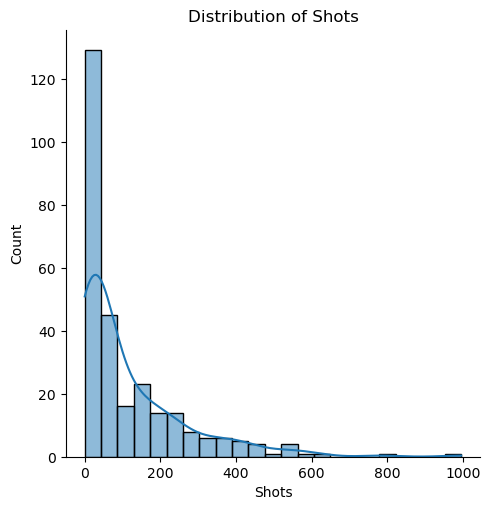

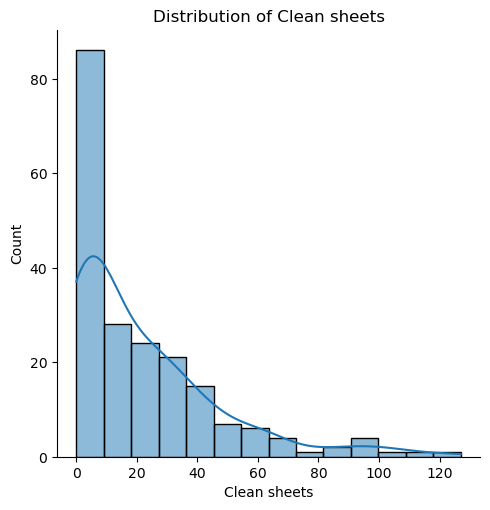

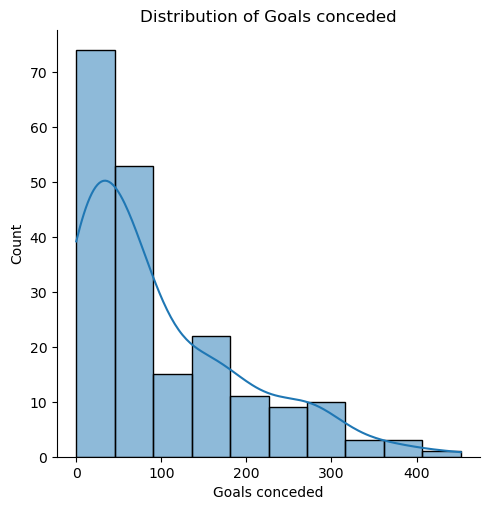

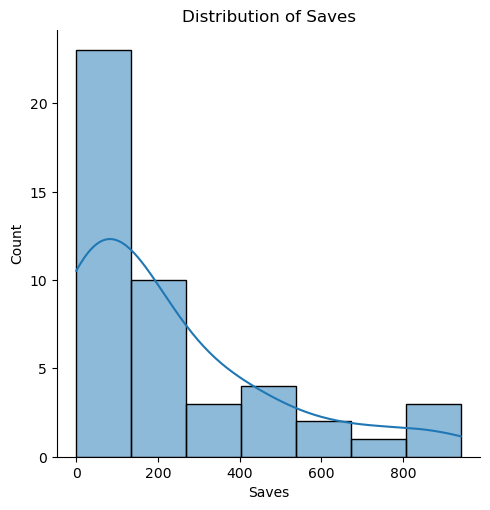

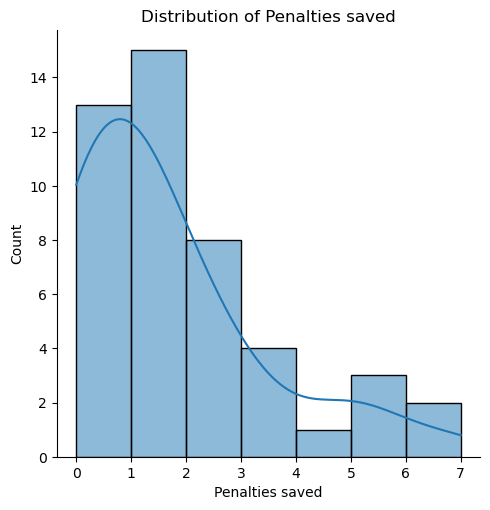

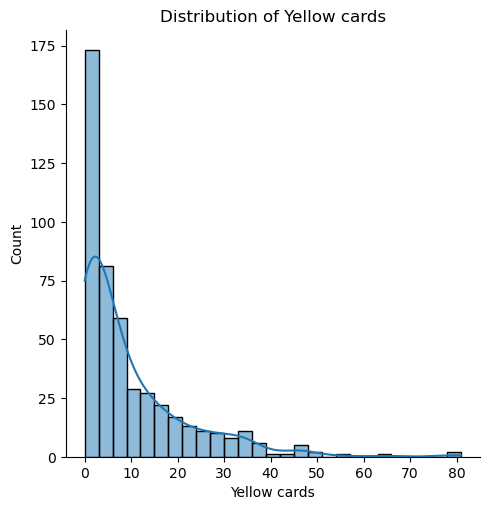

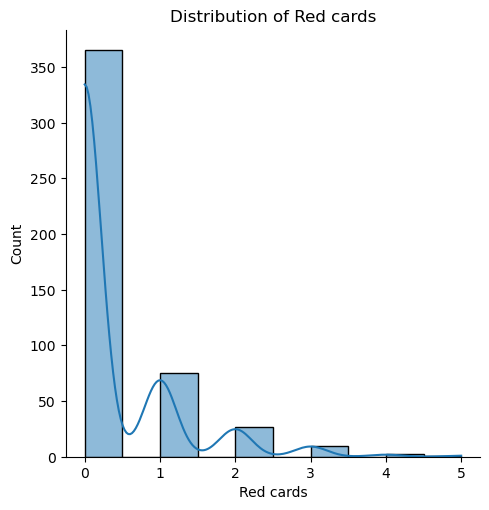

In [23]:
for num_col in ['Age', 'Appearances', 'Wins', 'Losses', 'Shots', 'Clean sheets', 
'Goals conceded', 'Saves', 'Penalties saved', 'Yellow cards', 'Red cards']:
    sns.displot(df[num_col], kde=True)
    plt.title(f'Distribution of {num_col}')
    plt.show()

Players having the most appearances in premier league

In [24]:
df_sorted_app = df.sort_values(by="Appearances", ascending=False)

<BarContainer object of 5 artists>

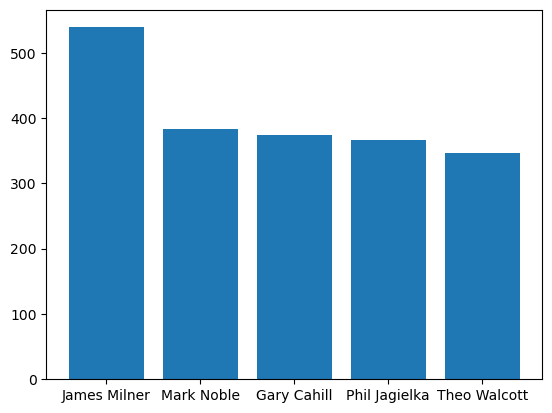

In [25]:
plt.bar(df_sorted_app["Name"].head(), df_sorted_app["Appearances"].head())

Players with highest number of goals

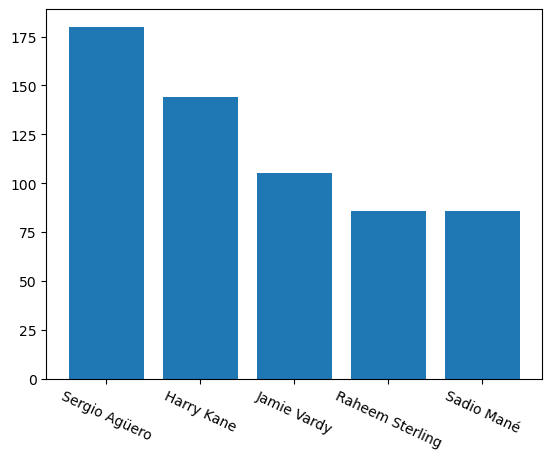

In [26]:
df_sorted_goals = df.sort_values(by="Goals", ascending=False)
plt.bar(df_sorted_goals["Name"].head(), df_sorted_goals["Goals"].head())
plt.xticks(rotation = -25);

Goalkeepers with highest number of saves

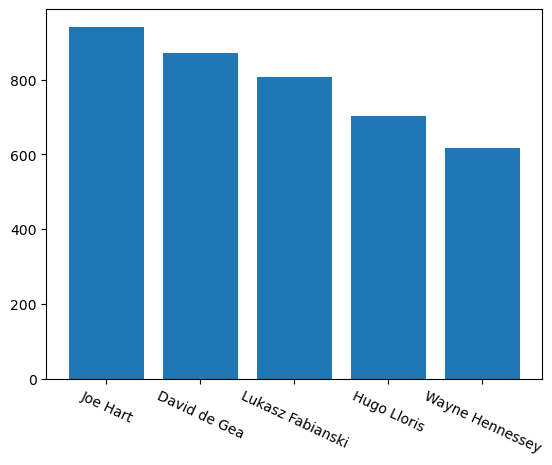

In [27]:
df_sorted_saves = df.sort_values(by="Saves", ascending=False)
plt.bar(df_sorted_saves["Name"].head(), df_sorted_saves["Saves"].head())
plt.xticks(rotation = -25);

Most represented nations

In [28]:
top_nationalities = df['Nationality'].value_counts().head(10).index.tolist()
top_nationalities

['England',
 'France',
 'Spain',
 'Brazil',
 'Ireland',
 'Portugal',
 'Scotland',
 'Argentina',
 'Netherlands',
 'Wales']

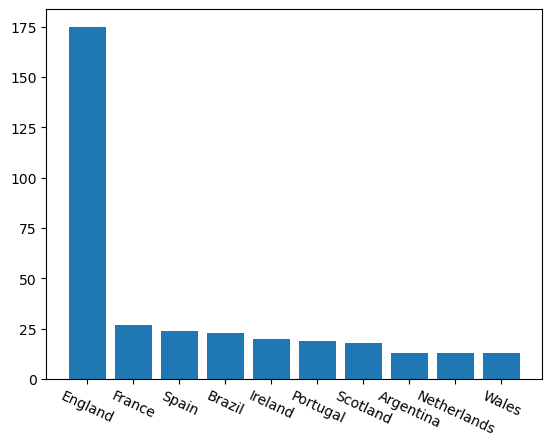

In [29]:
plt.bar(df['Nationality'].value_counts().head(10).index, df['Nationality'].value_counts().head(10).values)
plt.xticks(rotation = -25);



Most represented clubs

In [30]:
top_clubs = df['Club'].value_counts().head(10).index.tolist()

In [31]:
top_clubs

['Manchester-United',
 'Everton',
 'Leicester-City',
 'Liverpool',
 'Newcastle-United',
 'Arsenal',
 'Aston-Villa',
 'Crystal-Palace',
 'Tottenham-Hotspur',
 'Chelsea']

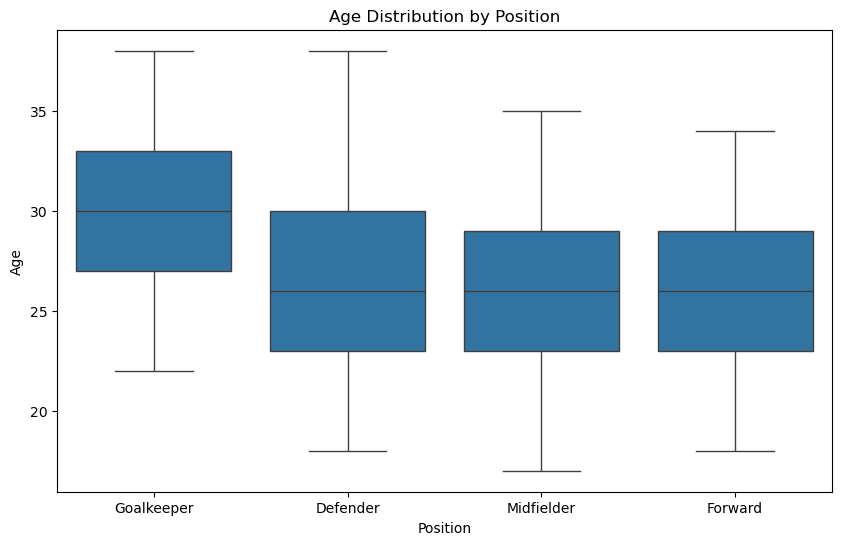

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Position', y='Age')
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Age Distribution by Position')
plt.show()


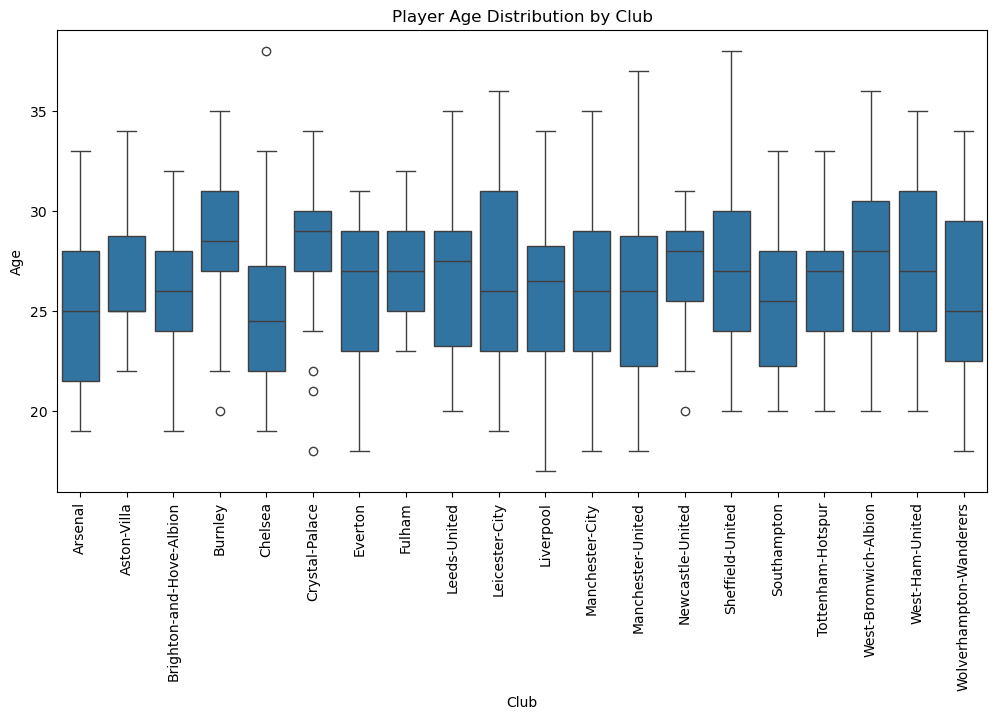

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Club', y='Age')
plt.xlabel('Club')
plt.ylabel('Age')
plt.title('Player Age Distribution by Club')
plt.xticks(rotation=90)
plt.show()


In [34]:
# For the future, I am considering the option of dividing the relevant statistics (e.g. wins, losses)
# by the number of appearances to get a better idea of the performance of the players, because currently
# the statistics are biased towards players who have had more seasons and appearances in the EPL.